# Projet Name
* Description

# 0.0 Imports

## 0.0 Libs

In [1]:
# Importação das bibliotecas

import numpy as np
import pandas as pd
import inflection
import datetime

import seaborn as sns
from matplotlib import pyplot as plt


# Pré-processamento
from sklearn.preprocessing  import RobustScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from category_encoders.count import CountEncoder

from sklearn import metrics           as mt
from sklearn import model_selection   as ms

####### Algoritmos para Classificação e Regressão
# from sklearn.neighbors      import KNeighborsClassifier
from sklearn.ensemble       import RandomForestClassifier
from xgboost                import XGBClassifier

# from sklearn.ensemble       import RandomForestRegressor

# from sklearn                import linear_model as lm
# from sklearn.linear_model   import LogisticRegression, LinearRegression, Lasso

from sklearn.linear_model   import LogisticRegression
from sklearn                import svm
from sklearn                import tree



####### Algoritmos só para Classificação
# from sklearn.naive_bayes  import MultinomialNB
# from sklearn.naive_bayes  import CategoricalNB
# from mixed_naive_bayes    import MixedNB


# --
# Lib para não mostrar warnings de melhorias futuras (sugestão de novos comandos) das bibliotecas
# import warnings
# warnings.filterwarnings('ignore')

from boruta                 import BorutaPy

# from IPython.display        import Image

# Fine Tunning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from skopt import BayesSearchCV


## 0.1 Help Functions

In [2]:
# Funções criadas para evitar retrabalho


def data_description(df):
    print('Variables:\n\n{}'.format(df.dtypes), end='\n\n')
    print('===============================')
    print('Number of rows {}'.format(df.shape[0]), end='\n\n')
    print('Number of columns {}'.format(df.shape[1]), end='\n\n')
    print('===============================')
    print('NA analysis'.format(end='\n') )
    for i in df.columns:
        print('column {}: {} {}'.format(i,df[i].isna().any(), df[i].isna().sum() ) )
    print('===============================')
    print('Unique values for each columns'.format(end='\n') )
    for i in df.columns:
        print('column {}: {}'.format(i,df[i].unique() ) )


def jupyter_settings():

#
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
#
#    display( HTML( '<style>.container { width:100% !important; }</style>') )
#    pd.options.display.max_columns = None
#    pd.options.display.max_rows = None
#    pd.set_option( 'display.expand_frame_repr', False )
#    
    sns.set()

jupyter_settings()

## 0.2 Load Data

In [3]:
# Coleta de dados do diretório /data, do banco de dados, ou outro lugar especificado abaixo

train = pd.read_csv('../data/train.csv')

test = pd.read_csv('../data/test.csv')


In [4]:
train.shape, test.shape

((72159, 15), (48106, 14))

In [5]:
train.sample(8).T

,48789,2921,23811,15180,29677,28610,43,47923
id,60988,41662,62172,82005,82103,77212,77744,93632
Classificação do hotel,4 estrelas,4 estrelas,4 estrelas,4 estrelas,4 estrelas,4 estrelas,4 estrelas,4 estrelas
Meses da reserva até o check-in,1,5,10,1,8,1,1,2
Número de pernoites reservadas,2,3,6,7,2,1,2,1
Número de hospedes,2.0,2.0,3.0,1.0,2.0,1.0,2.0,3.0
Regime de alimentação,Sem refeicao,Café da manha e jantar,Café da manha,Café da manha,Café da manha e jantar,Café da manha,Café da manha,Café da manha
Nacionalidade,United Kingdom,Italy,Netherlands,Angola,Spain,Spain,Spain,New Zealand
Forma de Reserva,Agência,Agência,Agência,Balcão,Agência,B2B,Balcão,Agência
Já se hospedou anterioremente,Não,Não,Não,Não,Não,Sim,Não,Não
Tipo do quarto reservado,Amethyst,Amethyst,Green Emerald,Pink Sapphire,Amethyst,Amethyst,Amethyst,Green Emerald


In [6]:
test.sample(5).T

,16975,5314,25928,47273,26488
id,116900,27310,43981,8804,15758
Classificação do hotel,4 estrelas,5 estrelas,4 estrelas,5 estrelas,5 estrelas
Meses da reserva até o check-in,15,3,3,12,16
Número de pernoites reservadas,3,5,2,5,2
Número de hospedes,2.0,3.0,2.0,1.0,2.0
Regime de alimentação,Café da manha,Café da manha,Café da manha,Café da manha,Café da manha e jantar
Nacionalidade,United Kingdom,Spain,Spain,United Kingdom,Spain
Forma de Reserva,Agência,Balcão,Agência,B2B,Agência
Já se hospedou anterioremente,Não,Não,Não,Não,Não
Tipo do quarto reservado,Amethyst,Tanzanite,Amethyst,Amethyst,Amethyst


## 0.3 Adjust Columns Names

In [7]:
# Concatenate train and test together
all_data = pd.concat([train, test])

In [8]:
## Alteração nome das variábeis

all_data.columns = [c.replace(' ', '_') for c in all_data.columns]

cols_old = all_data.columns

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#rename
all_data.columns = cols_new

# Split back into train and test
train = all_data[all_data['id'].isin(train['id'])]
test = all_data[all_data['id'].isin(test['id'])].drop('reserva_cancelada', axis=1)


In [9]:
train.columns

Index(['id', 'classificação_do_hotel', 'meses_da_reserva_até_o_check_in',
       'número_de_pernoites_reservadas', 'número_de_hospedes',
       'regime_de_alimentação', 'nacionalidade', 'forma_de_reserva',
       'já_se_hospedou_anterioremente', 'tipo_do_quarto_reservado',
       'reserva_feita_por_agência_de_turismo', 'reserva_feita_por_empresa',
       'reserva_com_estacionamento', 'reserva_com_observações',
       'reserva_cancelada'],
      dtype='object')

## 0.4 Split data "Production"

In [10]:
## Separação de dados que o modelo só utilizará no momento do teste, simulação de dados da produção (que nunca viu)

# features = df_test.drop(columns=['id', 'Reserva Cancelada'], axis=1)
# label = df_test['Reserva Cancelada']

# X, X_prod, y, y_prod = ms.train_test_split(features, label, split_size=0.2, random_state=42)


## 0.5 Split data Train & Validation

In [11]:
# Separação de dados de treino e validação

#X_train = train.drop(columns=['id', 'reserva_cancelada'])
#y_train = train['reserva_cancelada']

#X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [12]:
# X_train.shape

# 1.0 Data Description

In [13]:
## Backup do Dataframe

df1 = train.copy()

In [14]:
df1.sample(8).T

,65423,36249,16311,2828,58277,30902,7746,14177
id,40851,76785,32532,62181,92077,29578,42528,21649
classificação_do_hotel,4 estrelas,4 estrelas,5 estrelas,4 estrelas,4 estrelas,5 estrelas,4 estrelas,5 estrelas
meses_da_reserva_até_o_check_in,1,6,1,5,1,8,1,1
número_de_pernoites_reservadas,4,3,1,2,2,7,2,1
número_de_hospedes,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
regime_de_alimentação,Café da manha,Café da manha e jantar,Café da manha,Sem refeicao,Café da manha,Café da manha,Sem refeicao,Café da manha
nacionalidade,Spain,Spain,Spain,Spain,Italy,Spain,Spain,Spain
forma_de_reserva,Agência,Agência,Agência,Agência,Balcão,Agência,Agência,Balcão
já_se_hospedou_anterioremente,Não,Não,Não,Não,Não,Não,Não,Não
tipo_do_quarto_reservado,Amethyst,Amethyst,Amethyst,Amethyst,Amethyst,Pink Sapphire,Amethyst,Amethyst


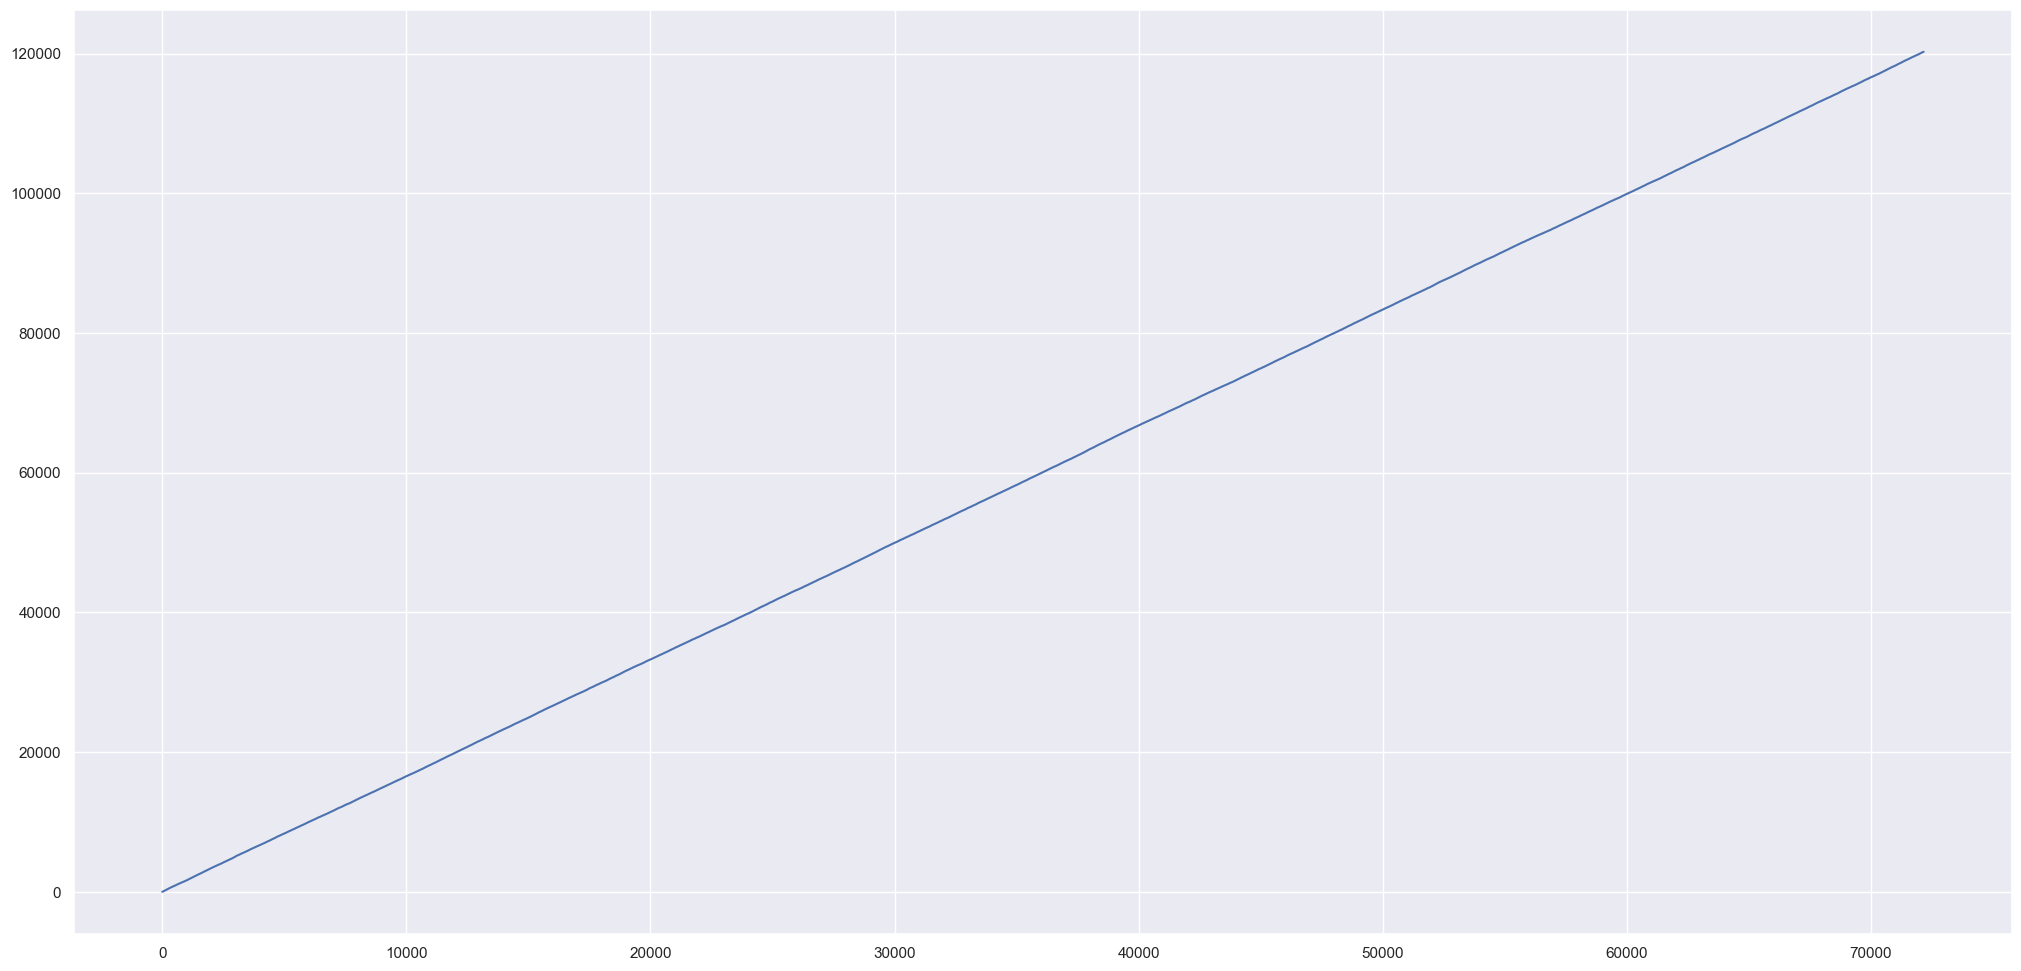

In [15]:
x = np.arange(1, df1.shape[0]+1, 1)
y = df1['id'].sort_values().values
sns.lineplot(x=x, y=y);

In [16]:
df1[df1['número_de_hospedes'].isna()].T

,8358,36627,64865
id,40887,40899,41412
classificação_do_hotel,4 estrelas,4 estrelas,4 estrelas
meses_da_reserva_até_o_check_in,1,1,1
número_de_pernoites_reservadas,2,2,7
número_de_hospedes,NaN,NaN,NaN
regime_de_alimentação,Café da manha,Café da manha,Café da manha
nacionalidade,Spain,Spain,Spain
forma_de_reserva,B2B,B2B,B2B
já_se_hospedou_anterioremente,Não,Não,Não
tipo_do_quarto_reservado,Blue Sapphire,Blue Sapphire,Blue Sapphire


In [17]:
df1.columns

Index(['id', 'classificação_do_hotel', 'meses_da_reserva_até_o_check_in',
       'número_de_pernoites_reservadas', 'número_de_hospedes',
       'regime_de_alimentação', 'nacionalidade', 'forma_de_reserva',
       'já_se_hospedou_anterioremente', 'tipo_do_quarto_reservado',
       'reserva_feita_por_agência_de_turismo', 'reserva_feita_por_empresa',
       'reserva_com_estacionamento', 'reserva_com_observações',
       'reserva_cancelada'],
      dtype='object')

## 1.1 Data Dimension

In [18]:
df1.shape

(72159, 15)

## 1.2 Data Types and Changes

In [19]:
df1.dtypes

id                                        int64
classificação_do_hotel                   object
meses_da_reserva_até_o_check_in           int64
número_de_pernoites_reservadas            int64
número_de_hospedes                      float64
regime_de_alimentação                    object
nacionalidade                            object
forma_de_reserva                         object
já_se_hospedou_anterioremente            object
tipo_do_quarto_reservado                 object
reserva_feita_por_agência_de_turismo     object
reserva_feita_por_empresa                object
reserva_com_estacionamento               object
reserva_com_observações                  object
reserva_cancelada                       float64
dtype: object

## 1.3 Check NA's

In [20]:
df1.isna().sum()

id                                         0
classificação_do_hotel                     0
meses_da_reserva_até_o_check_in            0
número_de_pernoites_reservadas             0
número_de_hospedes                         3
regime_de_alimentação                      0
nacionalidade                           1093
forma_de_reserva                           0
já_se_hospedou_anterioremente              0
tipo_do_quarto_reservado                   0
reserva_feita_por_agência_de_turismo       0
reserva_feita_por_empresa                  0
reserva_com_estacionamento                 0
reserva_com_observações                    0
reserva_cancelada                          0
dtype: int64

## 1.4 Data Descriptive

In [21]:
df1.describe()

,id,meses_da_reserva_até_o_check_in,número_de_pernoites_reservadas,número_de_hospedes,reserva_cancelada
count,72159.000000,72159.000000,72159.000000,72156.000000,72159.000000
mean,60093.687787,7.145928,15.824152,14.258773,0.370418
std,34726.028006,25.852330,98.248479,96.446167,0.482920
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30013.500000,1.000000,2.000000,2.000000,0.000000
50%,60080.000000,3.000000,3.000000,2.000000,0.000000
75%,90301.000000,6.000000,4.000000,2.000000,1.000000
max,120265.000000,311.000000,1172.000000,1153.000000,1.000000


### 1.4.1 Numerical Attributes

In [22]:
## Divisão de features numericas

num_attr = df1.select_dtypes(include=['int64', 'float64'])

In [23]:
## Tendência Central (média e mediana)

ct1 = pd.DataFrame(num_attr.apply(np.mean)).T
ct2 = pd.DataFrame(num_attr.apply(np.median)).T


## Dispersão (std, min, max, range, skew, kurtosis)

d1 = pd.DataFrame(num_attr.apply(np.std)).T
d2 = pd.DataFrame(num_attr.apply(np.min)).T
d3 = pd.DataFrame(num_attr.apply(np.max)).T
d4 = pd.DataFrame(num_attr.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attr.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attr.apply(lambda x: x.kurtosis())).T

## Concatenando os resultados

num_attr_result = pd.concat([d2, ct1, d3, d4, ct2, d1, d5, d6]).T.reset_index()
num_attr_result.columns = ['Atributos', 'Min', 'Media', 'Max', 'Range', 'Mediana', 'Desvio_Padrao', 'Skew', 'Kurtosis']
num_attr_result

,Atributos,Min,Media,Max,Range,Mediana,Desvio_Padrao,Skew,Kurtosis
0,id,1.0,60093.687787,120265.0,120264.0,60080.0,34725.787383,0.000051,-1.203219
1,meses_da_reserva_até_o_check_in,1.0,7.145928,311.0,310.0,3.0,25.852151,8.667253,79.725538
2,número_de_pernoites_reservadas,0.0,15.824152,1172.0,1172.0,3.0,98.247798,8.765012,80.204284
3,número_de_hospedes,0.0,14.258773,1153.0,1153.0,NaN,96.445499,8.723259,79.664540
4,reserva_cancelada,0.0,0.370418,1.0,1.0,0.0,0.482917,0.536675,-1.712028


### 1.4.2 Categorical Attributes

In [24]:
cat_attr = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [25]:
## Mostra os valores únicos das variáveis categóricas

cat_attr.apply(lambda x: x.unique().shape[0])



classificação_do_hotel                    2
regime_de_alimentação                     4
nacionalidade                           170
forma_de_reserva                          3
já_se_hospedou_anterioremente             2
tipo_do_quarto_reservado                 10
reserva_feita_por_agência_de_turismo      2
reserva_feita_por_empresa                 2
reserva_com_estacionamento                2
reserva_com_observações                   3
dtype: int64

# 2.0 Feature Engineering 

In [26]:
# Backup do Dataframe

df2 = df1.copy()

## 2.1 Mindmap

In [27]:
## Mostra imagem

# Image('img/imagem.png')

## 2.2 Hypothesis

In [28]:
# Criação de hipóteses (brainstorm)
df2.sample(5).T

,46057,1644,35422,20528,49280
id,51070,113322,64898,26300,78442
classificação_do_hotel,4 estrelas,4 estrelas,4 estrelas,5 estrelas,4 estrelas
meses_da_reserva_até_o_check_in,5,1,2,6,1
número_de_pernoites_reservadas,5,1,3,6,4
número_de_hospedes,2.0,1.0,2.0,2.0,1.0
regime_de_alimentação,Café da manha,Café da manha,Café da manha,Café da manha e jantar,Café da manha
nacionalidade,United Kingdom,China,Russia,Spain,United States
forma_de_reserva,Agência,Agência,Agência,Agência,Agência
já_se_hospedou_anterioremente,Não,Não,Não,Não,Não
tipo_do_quarto_reservado,Amethyst,Amethyst,Amethyst,Green Emerald,Amethyst


## 2.3 Feature Engineering 

In [29]:
## Criação das features para tentar responder as questões levantadas

df2['client_class'] = df2.apply(lambda x: 1 if (x['já_se_hospedou_anterioremente'] == 'Sim') &
                                               (x['reserva_com_estacionamento']    == 'Sim') else 0, axis=1)


In [30]:
df2.sample(10).T

,67356,40185,60329,5085,737,20715,57686,62492,59088,3250
id,75622,48102,15330,40780,54960,23358,24119,28078,33808,101472
classificação_do_hotel,4 estrelas,4 estrelas,5 estrelas,4 estrelas,4 estrelas,5 estrelas,5 estrelas,5 estrelas,5 estrelas,4 estrelas
meses_da_reserva_até_o_check_in,10,1,1,4,1,3,1,1,1,7
número_de_pernoites_reservadas,2,2,3,3,1,7,1,3,1,4
número_de_hospedes,2.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0
regime_de_alimentação,Café da manha,Café da manha,Café da manha,Café da manha e jantar,Café da manha,Café da manha e jantar,Café da manha,Café da manha e jantar,Café da manha,Café da manha
nacionalidade,Spain,Spain,Spain,Italy,Germany,France,Spain,Spain,Germany,United Kingdom
forma_de_reserva,Agência,Agência,B2B,Agência,Agência,Agência,B2B,Balcão,Agência,Agência
já_se_hospedou_anterioremente,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não
tipo_do_quarto_reservado,Amethyst,Amethyst,Amethyst,Amethyst,Green Emerald,Amethyst,Amethyst,Amethyst,Pink Sapphire,Amethyst


# 3.0 Data Filtering

In [31]:
# Backup do Dataframe

df3 = df2.copy()

In [32]:
## Caso seja necessária a retirada de alguma feature que não tenha relevância

# 4.0 EDA

In [33]:
# Backup do Dataframe

df4 = df3.copy()

## 4.1 Univariate Analysis

## 4.2 Bivariate Analysis

In [34]:
#plt.scatter(x='id', y='', data=df4);


## 4.3 Multivariate Analysis

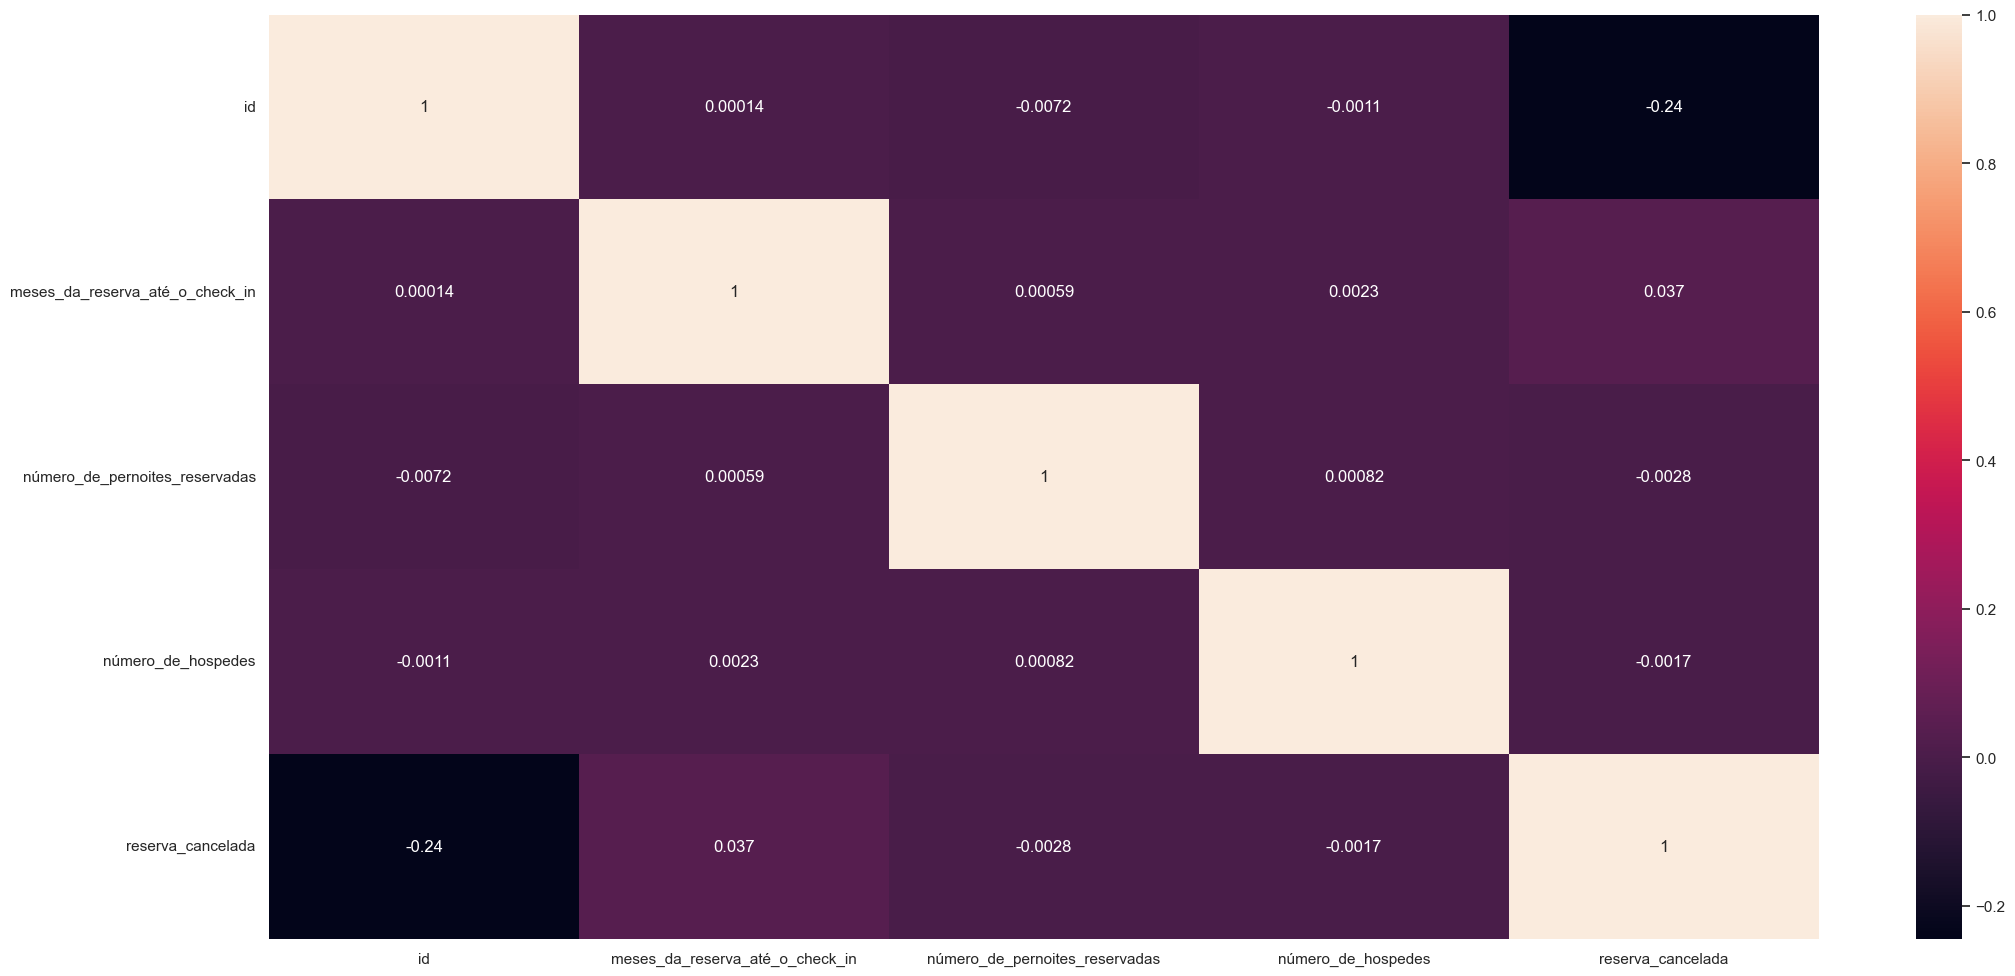

In [35]:
## Gráfico Mapa de calor - mostra a correlação entre as features (qt mais perto de 1, mais relacionado está)

correlation = num_attr.corr(method='pearson')

sns.heatmap(correlation, annot=True);

# 5.0 Data Preparation

In [36]:
# Backup do Dataframe

df5 = df4.copy()

## 5.1 Standardization

## 5.2 Rescaling

In [37]:
## Métodos para Rescala

rs = RobustScaler()
mms = MinMaxScaler()

## Exemplo
df5['id'] = mms.fit_transform(df5[['id']].values)
df5['meses_da_reserva_até_o_check_in'] = mms.fit_transform(df5[['meses_da_reserva_até_o_check_in']].values)
df5['número_de_pernoites_reservadas'] = mms.fit_transform(df5[['número_de_pernoites_reservadas']].values)
df5['número_de_hospedes'] = rs.fit_transform(df5[['número_de_hospedes']].values)


## 5.3 Encoder

In [38]:
le = LabelEncoder()

### 5.3.1 Encoding

In [39]:
## Label Encoding

df5['já_se_hospedou_anterioremente']         = le.fit_transform(df5['já_se_hospedou_anterioremente'])
df5['reserva_feita_por_agência_de_turismo']  = le.fit_transform(df5['reserva_feita_por_agência_de_turismo'])
df5['reserva_feita_por_empresa']             = le.fit_transform(df5['reserva_feita_por_empresa'])
df5['reserva_com_estacionamento']            = le.fit_transform(df5['reserva_com_estacionamento'])
df5['forma_de_reserva']                      = le.fit_transform(df5['forma_de_reserva'])
df5['classificação_do_hotel']                = le.fit_transform(df5['classificação_do_hotel'])

In [40]:
## Ordinal Encoding (dar peso)

## regime_de_alimentação
regime_alim_dict = {'Sem refeicao'                   : 0,
                    'Café da manha'                  : 1,
                    'Café da manha e jantar'         : 2,
                    'Café da manha, almoco e jantar' : 3}
df5['regime_de_alimentação'] = df5['regime_de_alimentação'].map(regime_alim_dict)

## tipo_do_quarto_reservado
#tp_quarto_dict = {
#'Moonstone'     :1,
#'Peridot'       :2,
#'Topaz'         :3,
#'Garnet'        :4,
#'Tanzanite'     :5, 
#'Amethyst'      :6,
#'Green Emerald' :7,
#'Pink Sapphire' :8,
#'Blue Sapphire' :9,   
#'Red Ruby'      :10 
#}
tp_quarto_dict = {
'Red Ruby'      :1,
'Blue Sapphire' :2,
'Pink Sapphire' :3,
'Green Emerald' :4,
'Amethyst'      :5,   
'Tanzanite'     :6,    
'Garnet'        :7,    
'Topaz'         :8,    
'Peridot'       :9,
'Moonstone'     :10
}

df5['tipo_do_quarto_reservado'] = df5['tipo_do_quarto_reservado'].map(tp_quarto_dict)

## reserva_com_observações
reserv_obs_dict = {'Nenhuma':0, '1 a 3':1, 'Mais de 3':2}
df5['reserva_com_observações'] = df5['reserva_com_observações'].map(reserv_obs_dict)


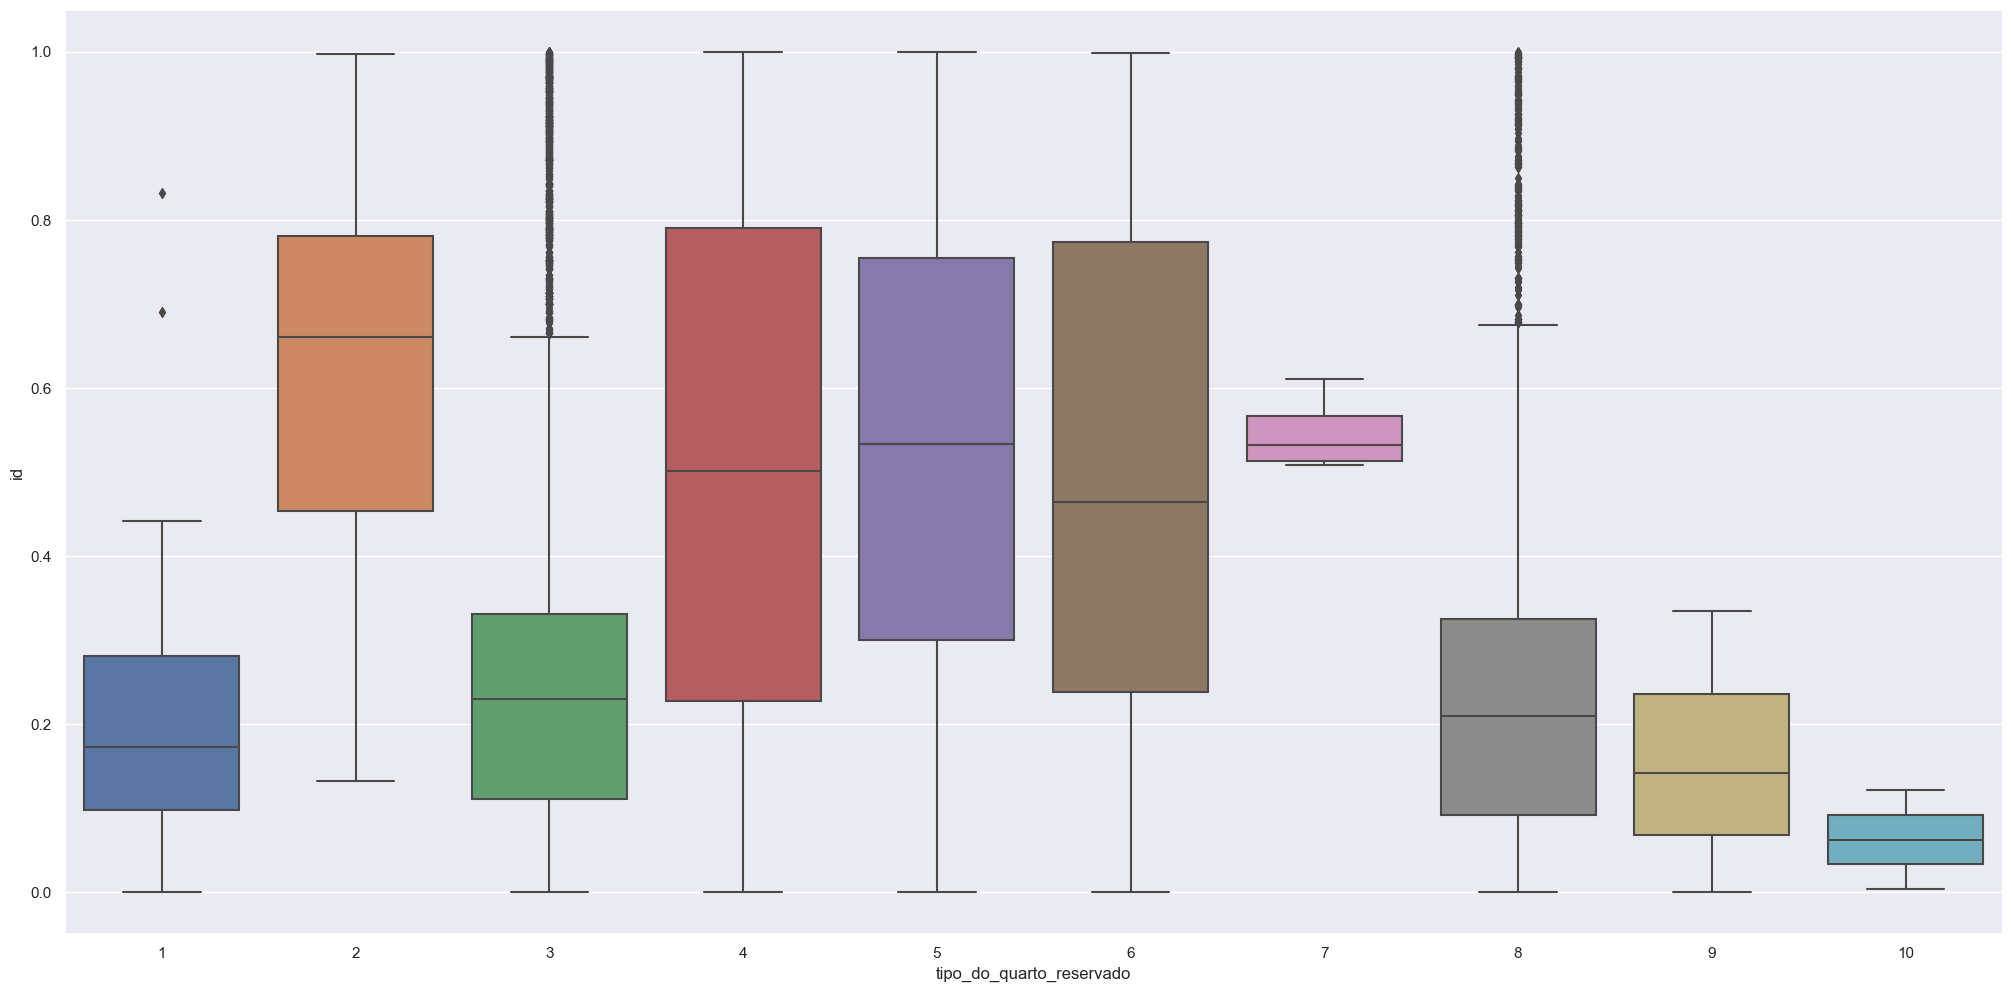

In [41]:
sns.boxplot(x='tipo_do_quarto_reservado', y='id', data=df5);

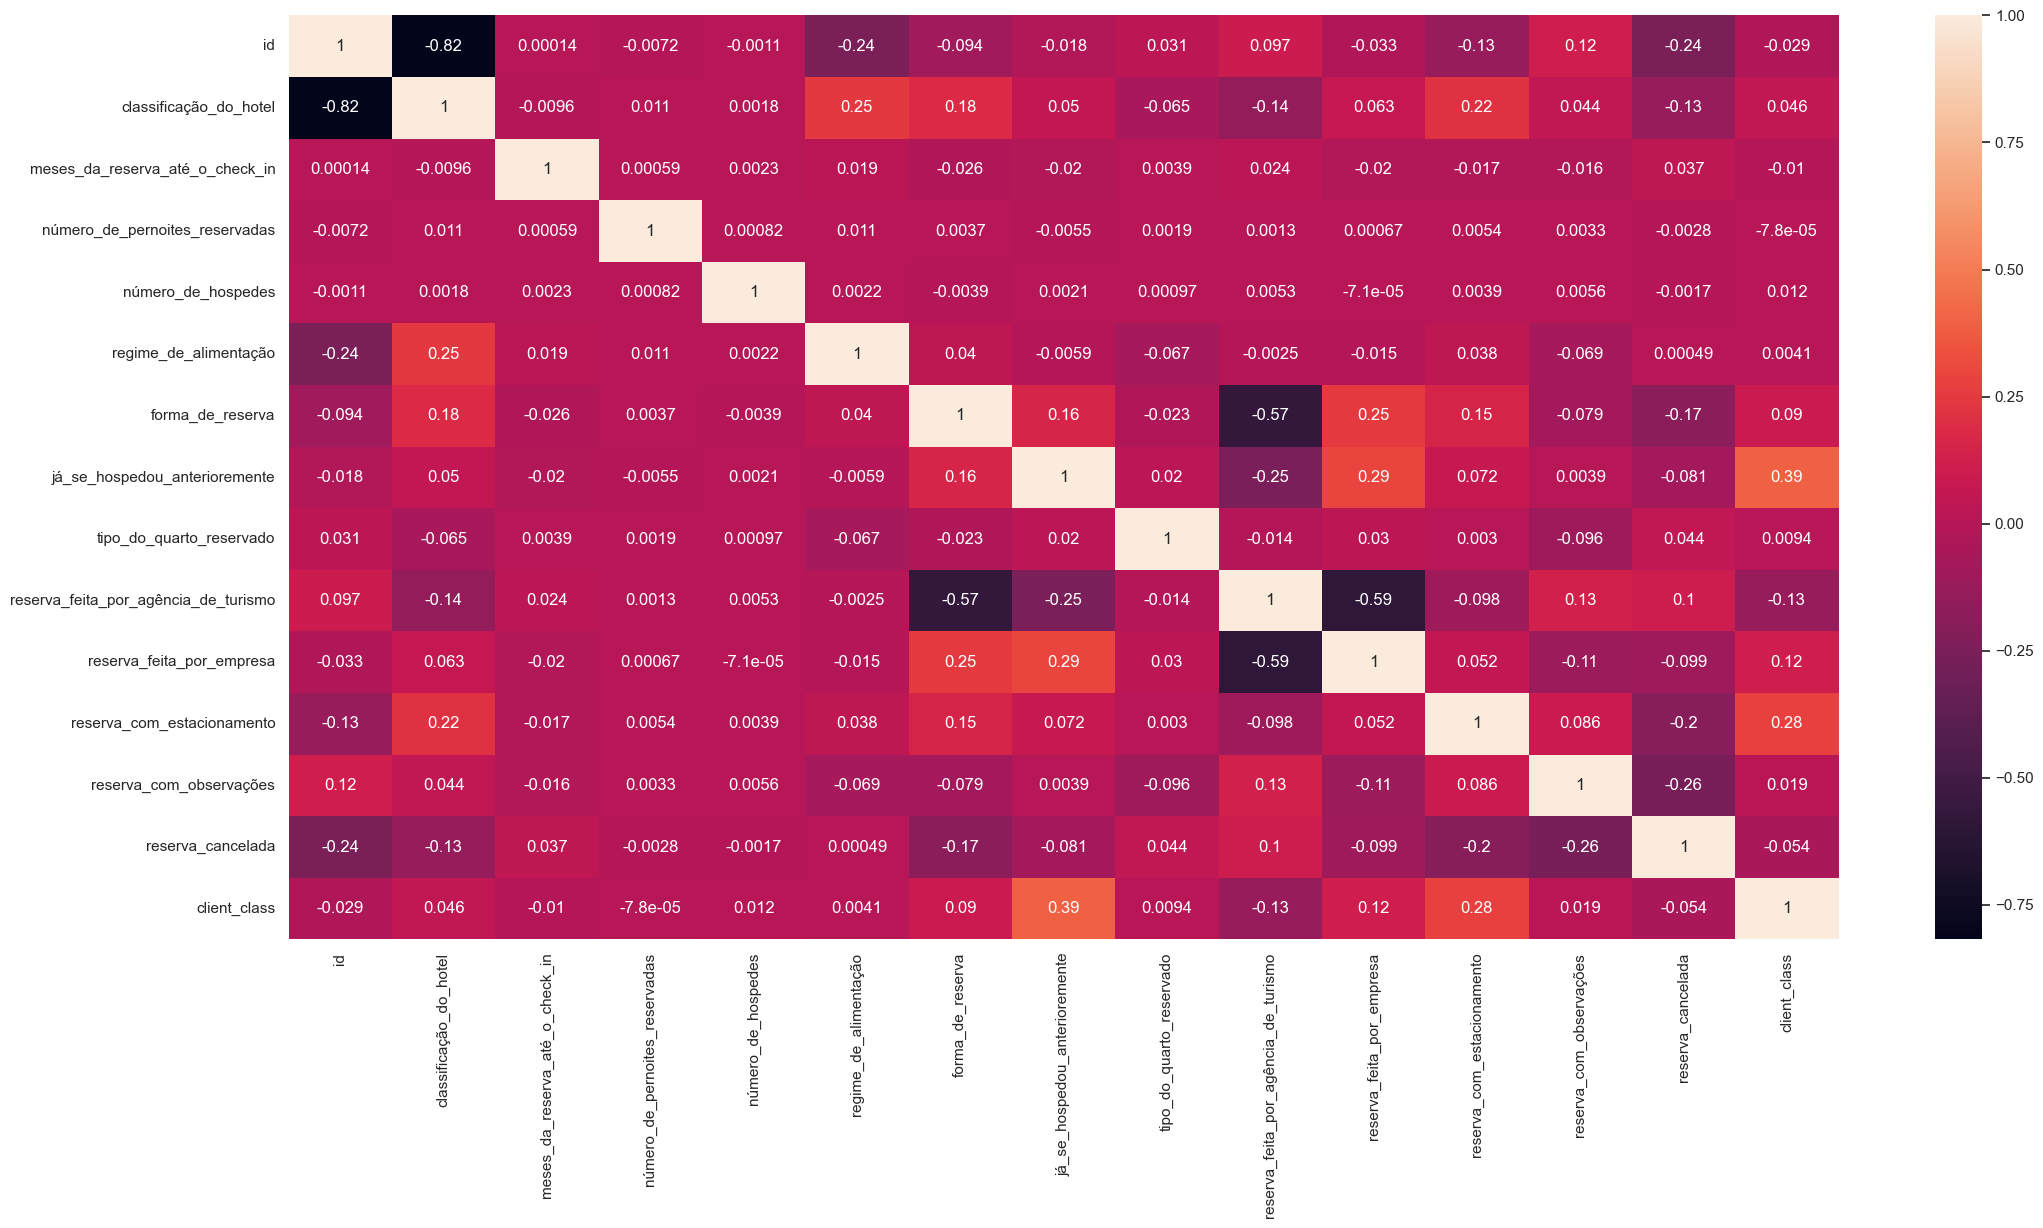

In [42]:
correlation = df5.corr(method='pearson')

sns.heatmap(correlation, annot=True);

In [43]:
## Category Encoders

count = CountEncoder(cols=['nacionalidade'], return_df=True) 
df5['nacionalidade'] = count.fit_transform(df5['nacionalidade'])


In [44]:
# Comentado pois não houve mudança no F1-Score

#df5['class_num_noites'] = df5['número_de_pernoites_reservadas'].apply(lambda x:
#                               1 if x <= 2     else
#                               2 if 2 < x <= 3 else
#                               3 if 3 < x <= 4 else
#                               4 if 4 < x <= 7 else
#                               5)
#
#df5['class_mes'] = df5['meses_da_reserva_até_o_check_in'].apply(lambda x:
#                               1 if x <= 1     else
#                               2 if 1 < x <= 3 else
#                               3 if 3 < x <= 6 else
#                               4 if 6 < x <=13 else
#                               5)

In [45]:
## Intervalos de ID (não melhorou)

#df5['class_id'] = df5['id'].apply(lambda x:
#                                  1 if x           <=       6000       else
#                                  2 if 6000        < x <=  (6000*2)    else
#                                  3 if (6000*2)    < x <=  (6000*3)    else
#                                  4 if (6000*3)    < x <=  (6000*4)    else
#                                  5 if (6000*4)    < x <=  (6000*5)    else
#                                  6 if (6000*5)    < x <=  (6000*6)    else
#                                  7 if (6000*6)    < x <=  (6000*7)    else
#                                  8 if (6000*7)    < x <=  (6000*8)    else
#                                  9 if (6000*8)    < x <=  (6000*9)    else
#                                 10 if (6000*9)    < x <=  (6000*10)   else
#                                 11 if (6000*10)   < x <=  (6000*11)   else
#                                 12 if (6000*11)   < x <=  (6000*12)   else
#                                 13 if (6000*12)   < x <=  (6000*13)   else
#                                 14 if (6000*13)   < x <=  (6000*14)   else
#                                 15 if (6000*14)   < x <=  (6000*15)   else
#                                 16 if (6000*15)   < x <=  (6000*16)   else
#                                 17 if (6000*16)   < x <=  (6000*17)   else
#                                 18 if (6000*17)   < x <=  (6000*18)   else
#                                 19 if (6000*18)   < x <=  (6000*19)   else
#                                 20)


In [46]:
df5.sample(10).T

,1312,21658,26492,3773,716,47531,1560,10424,37888,67666
id,0.321410,0.048477,0.527007,0.677776,0.105169,0.909033,0.610815,0.420458,0.992051,0.835129
classificação_do_hotel,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meses_da_reserva_até_o_check_in,0.000000,0.019355,0.003226,0.000000,0.035484,0.016129,0.022581,0.000000,0.000000,0.006452
número_de_pernoites_reservadas,0.000853,0.001706,0.001706,0.005119,0.005973,0.001706,0.005119,0.002560,0.000853,0.003413
número_de_hospedes,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,546.000000,1.000000,-1.000000
regime_de_alimentação,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
nacionalidade,34212.000000,4393.000000,34212.000000,421.000000,2061.000000,421.000000,4393.000000,149.000000,34212.000000,7267.000000
forma_de_reserva,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
já_se_hospedou_anterioremente,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tipo_do_quarto_reservado,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000


In [47]:
df5.dtypes

id                                      float64
classificação_do_hotel                    int32
meses_da_reserva_até_o_check_in         float64
número_de_pernoites_reservadas          float64
número_de_hospedes                      float64
regime_de_alimentação                     int64
nacionalidade                             int64
forma_de_reserva                          int32
já_se_hospedou_anterioremente             int32
tipo_do_quarto_reservado                  int64
reserva_feita_por_agência_de_turismo      int32
reserva_feita_por_empresa                 int32
reserva_com_estacionamento                int32
reserva_com_observações                   int64
reserva_cancelada                       float64
client_class                              int64
dtype: object

In [48]:
df5.isna().sum()

id                                      0
classificação_do_hotel                  0
meses_da_reserva_até_o_check_in         0
número_de_pernoites_reservadas          0
número_de_hospedes                      3
regime_de_alimentação                   0
nacionalidade                           0
forma_de_reserva                        0
já_se_hospedou_anterioremente           0
tipo_do_quarto_reservado                0
reserva_feita_por_agência_de_turismo    0
reserva_feita_por_empresa               0
reserva_com_estacionamento              0
reserva_com_observações                 0
reserva_cancelada                       0
client_class                            0
dtype: int64

In [49]:
df5[df5['número_de_hospedes'].isna()].T

,8358,36627,64865
id,0.339969,0.340069,0.344334
classificação_do_hotel,0.000000,0.000000,0.000000
meses_da_reserva_até_o_check_in,0.000000,0.000000,0.000000
número_de_pernoites_reservadas,0.001706,0.001706,0.005973
número_de_hospedes,NaN,NaN,NaN
regime_de_alimentação,1.000000,1.000000,1.000000
nacionalidade,34212.000000,34212.000000,34212.000000
forma_de_reserva,1.000000,1.000000,1.000000
já_se_hospedou_anterioremente,0.000000,0.000000,0.000000
tipo_do_quarto_reservado,2.000000,2.000000,2.000000


In [50]:
df5 = df5.fillna(0)

In [51]:
# Aletração da variável para inteiro 
df5['reserva_cancelada'] = df5['reserva_cancelada'].astype(int)
df5['número_de_hospedes'] = df5['número_de_hospedes'].astype(int)

In [52]:
df5.dtypes

id                                      float64
classificação_do_hotel                    int32
meses_da_reserva_até_o_check_in         float64
número_de_pernoites_reservadas          float64
número_de_hospedes                        int32
regime_de_alimentação                     int64
nacionalidade                             int64
forma_de_reserva                          int32
já_se_hospedou_anterioremente             int32
tipo_do_quarto_reservado                  int64
reserva_feita_por_agência_de_turismo      int32
reserva_feita_por_empresa                 int32
reserva_com_estacionamento                int32
reserva_com_observações                   int64
reserva_cancelada                         int32
client_class                              int64
dtype: object

### 5.3.2 Response Variable Transformation

### 5.3.3 Nature Transformation

## 5.4 Validation Preparation

# 6.0 Feature Selection

In [53]:
# Backup do Dataframe

df6 = df5.copy()

In [54]:
## Drop das features que não serão utilizadas

# X_train = df6.drop(['col_index','var_resposta'],axis=1)
# X_validation = X_validation.drop('var_resposta',axis=1)

## 6.1 Feature Selector (boruta)

In [55]:
train = df6.copy()
X_train = train.drop(columns='reserva_cancelada')
y_train = train['reserva_cancelada']

X_train_n = X_train.values
y_train_n = y_train.values.ravel() 
#define randomForestRegressor
rf = RandomForestClassifier(n_jobs=-1, n_estimators=400)
boruta = BorutaPy(rf, n_estimators='auto', random_state=42).fit(X_train_n,y_train_n)
cols_selected = boruta.support_.tolist()

X_train_fs = X_train
cols_selected_boruta = X_train_fs.iloc[:,cols_selected].columns.to_list()

cols_not_selected_boruta = list(np.setdiff1d(X_train_fs.columns,cols_selected_boruta) )
cols_selected_boruta

['id',
 'classificação_do_hotel',
 'meses_da_reserva_até_o_check_in',
 'nacionalidade',
 'reserva_com_observações']

## 6.2 Feature Importance (RandomForest)

In [56]:
## Lista de features ordenadas por importância

# Define
# rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(X_train, y_train)
# feature_importance_sorted = rf.feature_importances_.argsort()

## Exibição
# sns.barplot(y=rf.feature_names_in_[feature_importance_sorted], x=rf.feature_importances_[feature_importance_sorted] );
# df_feature_importance_rf = pd.DataFrame( {'feature'    :rf.feature_names_in_[feature_importance_sorted],
#                                           'importance' :rf.feature_importances_[feature_importance_sorted] } )
# df_feature_importance_rf.sort_values(by='importance', ascending=False)

## 6.3 Feature Importance (XGBoost)

In [57]:
## Lista de features ordenadas por importância

# xgbc = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(X_train, y_train)
# feature_importance_sorted = xgbc.feature_importances_.argsort()

## Exibição
# sns.barplot(y=xgbc.feature_names_in_[feature_importance_sorted], x=xgbc.feature_importances_[feature_importance_sorted] );
# df_feature_importance_xgbc = pd.DataFrame( {'feature':xgbc.feature_names_in_[feature_importance_sorted],
#                                             'importance': xgbc.feature_importances_[feature_importance_sorted] } )
# df_feature_importance_xgbc.sort_values(by='importance', ascending=False)

# 7.0 Machine Learning Models

In [58]:
#cols_importants = ['id', 'classificação_do_hotel', 'meses_da_reserva_até_o_check_in',
#                    'nacionalidade', 'reserva_com_observações', 'reserva_cancelada']
#train = df6[cols_importants]

train = df6.copy()
X_train = train.drop(columns='reserva_cancelada')
y_train = train['reserva_cancelada']

X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [59]:
X_train.dtypes, X_val.dtypes

(id                                      float64
 classificação_do_hotel                    int32
 meses_da_reserva_até_o_check_in         float64
 número_de_pernoites_reservadas          float64
 número_de_hospedes                        int32
 regime_de_alimentação                     int64
 nacionalidade                             int64
 forma_de_reserva                          int32
 já_se_hospedou_anterioremente             int32
 tipo_do_quarto_reservado                  int64
 reserva_feita_por_agência_de_turismo      int32
 reserva_feita_por_empresa                 int32
 reserva_com_estacionamento                int32
 reserva_com_observações                   int64
 client_class                              int64
 dtype: object,
 id                                      float64
 classificação_do_hotel                    int32
 meses_da_reserva_até_o_check_in         float64
 número_de_pernoites_reservadas          float64
 número_de_hospedes                        int32
 reg

In [60]:
# Dados de Treino + Validação

#values = [i for i in range(1, 60)]
#test_score = list()

#for i in values:

    ## Define
#    dt_model = tree.DecisionTreeClassifier(max_depth=i)

    ## Training
#    dt_model.fit(X_train, y_train)

    ## Classificação
#    yhat_val = dt_model.predict(X_val)

    ## Métrica sobre os dados de validação
#    f1score_val = mt.f1_score(y_val, yhat_val)
    #print('F1-Score over Validation: {}'.format(f1score_val))
#    test_score.append(f1score_val)


In [61]:
#plt.plot(values, test_score, '-o', label='Test');

In [62]:
## Define
#dt_model = tree.DecisionTreeClassifier(max_depth=14)

## Training
#dt_model.fit(X_train, y_train)

## Classificação
#yhat_val = dt_model.predict(X_val)

## Métrica sobre os dados de validação
#f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
#print('F1-Score over Validation: {}'.format(f1score_val))

In [63]:
# Dados de Treino + Validação

## Define
#lr_model = LogisticRegression()

## Training
#lr_model.fit(X_train, y_train)

## Classificação
#yhat_val = lr_model.predict(X_val)

## Métrica sobre os dados de validação
# f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
#f1score_val = mt.f1_score(y_val, yhat_val)
#print('F1-Score over Validation: {}'.format(f1score_val))



In [64]:
# Dados de Treino + Validação

## Define
#model_svm = svm.SVC()

## Training
#model_svm.fit(X_train, y_train)

## Classificação
#yhat_val = model_svm.predict(X_val)

## Métrica sobre os dados de validação
#f1score_val = mt.f1_score(y_val, yhat_val)
#print('F1-Score over Validation: {}'.format(f1score_val))

# Resultado sem macro
#F1-Score over Validation: 0.8504432370603374


In [65]:
#f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
#print('F1-Score over Validation: {}'.format(f1score_val))

# Resultado com macro
#F1-Score over Validation: 0.8825230935206438

In [66]:
# Dados de Treino + Validação

## Define
#model_xgb = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=500)
#model_xgb = XGBClassifier(n_estimators=200) #0.9726429809358752
#model_xgb = XGBClassifier(n_estimators=650) #0.9738586411533524

## Training
#model_xgb.fit(X_train, y_train)

## Classificação
#yhat_val = model_xgb.predict(X_val)


In [67]:
## Métrica sobre os dados de validação
#f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
#print('F1-Score over validation: {}'.format(f1score_val))

#F1-Score over validation: 0.9706334958847082

# splitando 0.1
#F1-Score over validation: 0.9731097027505708


In [68]:
#values = [i for i in range(100, 1000, 50)]
#test_score = list()

#for i in values:

    ## Define
#    model_xgb = XGBClassifier(n_estimators=i)

    ## Training
#    model_xgb.fit(X_train, y_train)

    ## Classificação
#    yhat_val = model_xgb.predict(X_val)

    ## Métrica sobre os dados de validação
#    f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
    #print('F1-Score over Validation: {}'.format(f1score_val))
#    test_score.append(f1score_val)

In [69]:
#plt.plot(values, test_score, '-o', label='Test');

In [70]:
# Dados de Treino + Validação

## Define
#model_rf = RandomForestClassifier() #0.9716405467834264
#model_rf = RandomForestClassifier(n_estimators=650) # 0.9726931619378634
#model_rf = RandomForestClassifier(max_depth=20,
#                                  min_impurity_decrease=0.0,
#                                  min_samples_split=2,
#                                  n_estimators=1200) # 0.9728454505969373
model_rf = RandomForestClassifier(n_estimators= 400, min_samples_split= 2, 
                               min_samples_leaf= 2, max_features= 10, 
                               max_depth= 20, criterion= 'gini',  
                               bootstrap = True, n_jobs=-1, 
                               random_state=42) # 0.9736885394399479
## Training
model_rf.fit(X_train, y_train)

## Classificação
yhat_val = model_rf.predict(X_val)


In [71]:
## Métrica sobre os dados de validação
f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
print('F1-Score over validation: {}'.format(f1score_val))


F1-Score over validation: 0.97339231209161


## 7.1 Models and Cross-Validation

## 7.2 Model to Submission

In [72]:
## Label Encoding

test['já_se_hospedou_anterioremente']         = le.fit_transform(test['já_se_hospedou_anterioremente'])
test['reserva_feita_por_agência_de_turismo']  = le.fit_transform(test['reserva_feita_por_agência_de_turismo'])
test['reserva_feita_por_empresa']             = le.fit_transform(test['reserva_feita_por_empresa'])
test['reserva_com_estacionamento']            = le.fit_transform(test['reserva_com_estacionamento'])
test['forma_de_reserva']                      = le.fit_transform(test['forma_de_reserva'])
test['classificação_do_hotel']                = le.fit_transform(test['classificação_do_hotel'])

## Ordinal Encoding (dar peso)

## regime_de_alimentação
regime_alim_dict = {'Sem refeicao'                   : 3,
                    'Café da manha'                  : 2,
                    'Café da manha e jantar'         : 1,
                    'Café da manha, almoco e jantar' : 0}
test['regime_de_alimentação'] = test['regime_de_alimentação'].map(regime_alim_dict)

## tipo_do_quarto_reservado
tp_quarto_dict = {
'Moonstone'     :1,
'Peridot'       :2,
'Topaz'         :3,
'Garnet'        :4,
'Tanzanite'     :5, 
'Amethyst'      :6,
'Green Emerald' :7,
'Pink Sapphire' :8,
'Blue Sapphire' :9,   
'Red Ruby'      :10 
}
test['tipo_do_quarto_reservado'] = test['tipo_do_quarto_reservado'].map(tp_quarto_dict)

## reserva_com_observações
reserv_obs_dict = {'Nenhuma':2, '1 a 3':1, 'Mais de 3':0}
test['reserva_com_observações'] = test['reserva_com_observações'].map(reserv_obs_dict)


## Category Encoders

count = CountEncoder(cols=['nacionalidade'], return_df=True) 
test['nacionalidade'] = count.fit_transform(test['nacionalidade'])



## Limpezas dos NA's
test = test.fillna(0)


## Alteração da variável alvo
test['número_de_hospedes'] = test['número_de_hospedes'].astype(int)
test['regime_de_alimentação'] = test['regime_de_alimentação'].astype(int)
test['tipo_do_quarto_reservado'] = test['tipo_do_quarto_reservado'].astype(int)
test['reserva_com_observações'] = test['reserva_com_observações'].astype(int)

In [73]:
test.dtypes

id                                      int64
classificação_do_hotel                  int32
meses_da_reserva_até_o_check_in         int64
número_de_pernoites_reservadas          int64
número_de_hospedes                      int32
regime_de_alimentação                   int32
nacionalidade                           int64
forma_de_reserva                        int32
já_se_hospedou_anterioremente           int32
tipo_do_quarto_reservado                int32
reserva_feita_por_agência_de_turismo    int32
reserva_feita_por_empresa               int32
reserva_com_estacionamento              int32
reserva_com_observações                 int32
dtype: object

In [74]:
#predicao_lr = model.predict(test)

#df_final_lr = pd.concat([test.id, pd.Series(predicao_lr, name = 'Reserva Cancelada')], axis=1)

#df_final_lr.head()


In [75]:
#predicao_svm = model_svm.predict(test)

#df_final_svm = pd.concat([test.id, pd.Series(predicao_svm, name = 'Reserva Cancelada')], axis=1)

#df_final_svm.head()


In [76]:
#predicao_dt = dt_model.predict(test)

#df_final_dt = pd.concat([test.id, pd.Series(predicao_dt, name = 'Reserva Cancelada')], axis=1)

#df_final_dt.head()


In [77]:
#predicao_xgb = model_xgb.predict(test)

#df_final_xgb = pd.concat([test.id, pd.Series(predicao_xgb, name = 'Reserva Cancelada')], axis=1)

#df_final_xgb.head()


In [78]:
predicao_rf = model_rf.predict(test)

df_final_rf = pd.concat([test.id, pd.Series(predicao_rf, name = 'Reserva Cancelada')], axis=1)

df_final_rf.head()


C:\Users\marci\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- client_class

  warnings.warn(message, FutureWarning)


ValueError: X has 14 features, but RandomForestClassifier is expecting 15 features as input.

In [ ]:
df_final_rf.dtypes

In [ ]:
df_final_rf.to_csv('../data/result/submission.csv', index=False) #Arquivo de submissão pronto para ser enviado.

# 8.0 Hyperparameter Fine Tunning

## 8.1 Model 1 (RandomForest)

In [ ]:
## Definição dos parâmetros utilizados pelo algoritmo

#parameters = {
#     'n_estimators': [800,1200,2000],
#     'max_depth': [5,20,40,80,None],
#     'min_samples_split': [2,10,20,40],
#     'min_impurity_decrease': [0,.05,0.1]
#}


## Definição do método

#skf = StratifiedKFold(n_splits = 10)
#rf_search =  BayesSearchCV(estimator = RandomForestClassifier(max_features = 'sqrt'),
#                            search_spaces = parameters,
#                            n_jobs = -1,
#                            cv = skf,
#                            scoring = 'f1_weighted',
#                            random_state = 42)

#rf_search_result = rf_search.fit(X_train, y_train)

In [ ]:
#rf_search_result.best_params_

#OrderedDict([('max_depth', 20),
#             ('min_impurity_decrease', 0.0),
#             ('min_samples_split', 2),
#             ('n_estimators', 1200)]

## 8.1 Model 2 (XGBoost)

In [ ]:
## Definição dos parâmetros utilizados pelo algoritmo

#parameters = {
#     'n_estimators': [500,800,1200,1600,2200,3000],
#     'learning_rate': [0.05,0.1,0.15],
#     'max_depth': [10,20,40,80,None],
#     'min_samples_split': [2,10,20,40,100],
#     'min_impurity_decrease': [0,.05,.1],
#     'colsample_bytree': [0.3,0.5,0.8],
#     'subsample': [0.1,0.4,0.7]
#}


#skf = StratifiedKFold(n_splits=10)
#xgb_search =  BayesSearchCV(estimator = XGBClassifier(),
#                            search_spaces = parameters,
#                            n_jobs = -1,
#                            cv = skf,
#                            scoring = 'f1_weighted',
#                            random_state = 42)

#xgb_search_result = xgb_search.fit(X_train, y_train)

In [ ]:
#model = XGBClassifier()
#n_estimators = range(50, 400, 50)
#param_grid = dict(n_estimators=n_estimators)
#kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
#grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
#grid_result = grid_search.fit(X_train, y_train)

In [ ]:
#grid_result